In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("Daily activity metrics.csv")
df.head()

,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Average weight (kg),Max weight (kg),Min weight (kg),Cycling duration (ms),Walking duration (ms),Running duration (ms),Calisthenics duration (ms)
0,2022-08-03,67.0,617.878588,3413.194972,18.0,18.0,0.565501,1.459932,0.298564,5364,52.0,52.0,52.0,NaN,3889928.0,NaN,NaN
1,2022-08-04,41.0,1394.882813,1699.767803,NaN,NaN,0.402249,1.160393,0.257383,3125,NaN,NaN,NaN,NaN,1343690.0,NaN,NaN
2,2022-08-05,6.0,1351.692386,234.169271,NaN,NaN,0.373200,0.872139,0.288269,616,NaN,NaN,NaN,NaN,246274.0,NaN,NaN
3,2022-08-06,3.0,1347.269729,126.632257,NaN,NaN,0.341263,0.428228,0.267678,506,NaN,NaN,NaN,NaN,133899.0,NaN,NaN
4,2022-08-07,42.0,1429.756733,2211.826682,12.0,12.0,0.426071,1.210147,0.257383,3610,NaN,NaN,NaN,NaN,1990308.0,101564.0,NaN


In [4]:
df1=df[['Date','Calories (kcal)','Step count','Heart Points']]
df1.head()


,Date,Calories (kcal),Step count,Heart Points
0,2022-08-03,617.878588,5364,18.0
1,2022-08-04,1394.882813,3125,NaN
2,2022-08-05,1351.692386,616,NaN
3,2022-08-06,1347.269729,506,NaN
4,2022-08-07,1429.756733,3610,12.0


Data Preprocessing

In [ ]:
df1.fillna(0, inplace=True)


In [ ]:
df1.isna().sum()

Date               0
Calories (kcal)    0
Step count         0
Heart Points       0
dtype: int64

In [ ]:
df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             450 non-null    object 
 1   Calories (kcal)  450 non-null    float64
 2   Step count       450 non-null    int64  
 3   Heart Points     450 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.2+ KB


In [ ]:
df1.dtypes

Date                object
Calories (kcal)    float64
Step count           int64
Heart Points       float64
dtype: object

Label conversion

In [5]:
df1['Date'] = pd.to_datetime(df['Date'])

# Extract the weekday number and add it as a new column
df1['Weekday'] = df1['Date'].dt.weekday

# Select the desired columns
df1 = df1[['Weekday', 'Calories (kcal)', 'Step count']]



Data Visualization

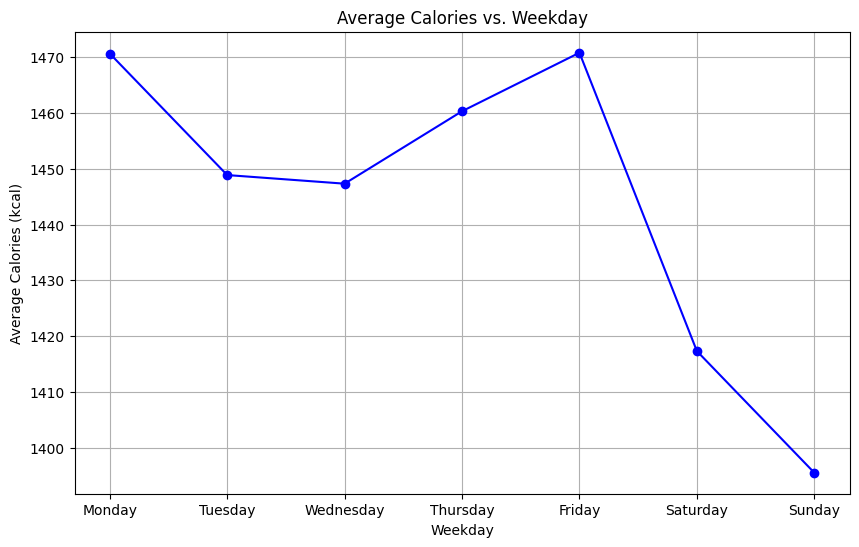

In [6]:
import matplotlib.pyplot as plt

# Group the data by 'Weekday' and calculate the mean calories for each weekday
weekday_calories = df1.groupby('Weekday')['Calories (kcal)'].mean()

# Define the weekday names for labeling the x-axis
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the calories vs. weekday
plt.figure(figsize=(10, 6))
plt.plot(weekday_names, weekday_calories, marker='o', linestyle='-', color='b')
plt.xlabel("Weekday")
plt.ylabel("Average Calories (kcal)")
plt.title("Average Calories vs. Weekday")
plt.grid(True)
plt.show()

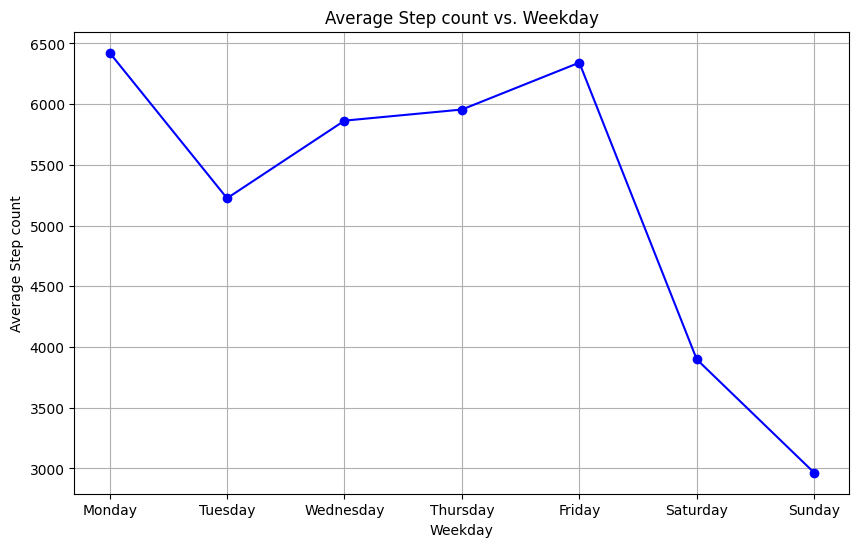

In [7]:
import matplotlib.pyplot as plt

# Group the data by 'Weekday' and calculate the mean calories for each weekday
weekday_calories = df1.groupby('Weekday')['Step count'].mean()

# Define the weekday names for labeling the x-axis
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the calories vs. weekday
plt.figure(figsize=(10, 6))
plt.plot(weekday_names, weekday_calories, marker='o', linestyle='-', color='b')
plt.xlabel("Weekday")
plt.ylabel("Average Step count")
plt.title("Average Step count vs. Weekday")
plt.grid(True)
plt.show()

Normalization / Transformation

In [8]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df1.select_dtypes(include='number')
scaler = MinMaxScaler()
n_df1 = scaler.fit_transform(numeric_columns)
n_df1 = pd.DataFrame(n_df1, columns=numeric_columns.columns)

In [ ]:
n_df1.head()

,Weekday,Calories (kcal),Step count
0,0.333333,0.000000,0.285174
1,0.500000,0.626493,0.165894
2,0.666667,0.591669,0.032231
3,0.833333,0.588103,0.026370
4,1.000000,0.654611,0.191732


Train - Test split

In [9]:
from sklearn.model_selection import train_test_split

X=n_df1[['Weekday']]
y=n_df1[['Calories (kcal)', 'Step count']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
#y_pred

In [ ]:
print(n_df1)

      Weekday  Calories (kcal)  Step count
0    0.333333         0.000000    0.285174
1    0.500000         0.626493    0.165894
2    0.666667         0.591669    0.032231
3    0.833333         0.588103    0.026370
4    1.000000         0.654611    0.191732
..        ...              ...         ...
445  1.000000         0.673676    0.304885
446  0.000000         0.572640    0.059507
447  0.166667         0.561478    0.021895
448  0.333333         0.674283    0.250919
449  0.500000         0.583419    0.366416

[450 rows x 3 columns]


Linear Regression

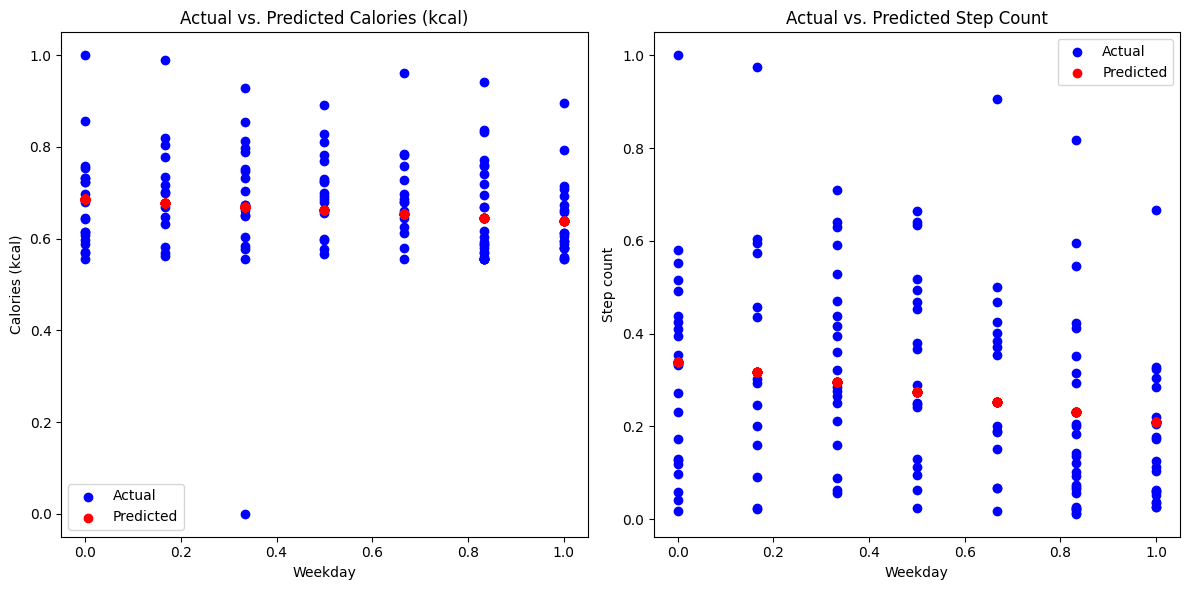

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values for X_test
y_pred = model.predict(X_test)

# Extract the weekdays from X_test
weekdays = X_test['Weekday']

# Plot the actual and predicted values for Calories (kcal)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(weekdays, y_test['Calories (kcal)'], color='b', label='Actual')
plt.scatter(weekdays, y_pred[:, 0], color='r', label='Predicted')
plt.xlabel('Weekday')
plt.ylabel('Calories (kcal)')
plt.title('Actual vs. Predicted Calories (kcal)')
plt.legend()

# Plot the actual and predicted values for Step count
plt.subplot(1, 2, 2)
plt.scatter(weekdays, y_test['Step count'], color='b', label='Actual')
plt.scatter(weekdays, y_pred[:, 1], color='r', label='Predicted')
plt.xlabel('Weekday')
plt.ylabel('Step count')
plt.title('Actual vs. Predicted Step Count')
plt.legend()

plt.tight_layout()
plt.show()



Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R2): {:.2f}".format(r2))



Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared (R2): 0.03


Finding the relationship between Steps and Calories

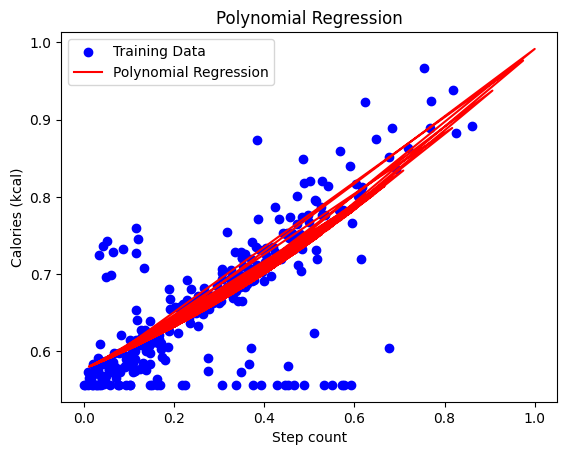

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load your data
df = pd.read_csv("Daily activity metrics.csv")
df1 = df[['Date', 'Calories (kcal)', 'Step count', 'Heart Points']]
df1['Date'] = pd.to_datetime(df['Date'])

# Extract the weekday number and add it as a new column
df1['Weekday'] = df1['Date'].dt.weekday

# Select the desired columns
df1 = df1[['Weekday', 'Calories (kcal)', 'Step count']]

# Normalize the numeric columns
numeric_columns = df1.select_dtypes(include='number')
scaler = MinMaxScaler()
n_df1 = scaler.fit_transform(numeric_columns)
n_df1 = pd.DataFrame(n_df1, columns=numeric_columns.columns)

# Split the data into training and testing sets
X = n_df1[['Step count']]
y = n_df1[['Calories (kcal)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create polynomial features
degree = 2  # You can adjust the degree to fit a different order of polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

# Transform the test data to include polynomial features
X_test_poly = poly.transform(X_test)

# Make predictions
y_pred = poly_reg.predict(X_test_poly)

# Visualize the results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Step count')
plt.ylabel('Calories (kcal)')
plt.legend()
plt.show()


In [ ]:
Based on the above outcomes, building a KNN model to classify into two groups:
1) "if he/she does follow a healthy normal routine that day"
2) "if he/she does follow a healthy abnormal routine that day"

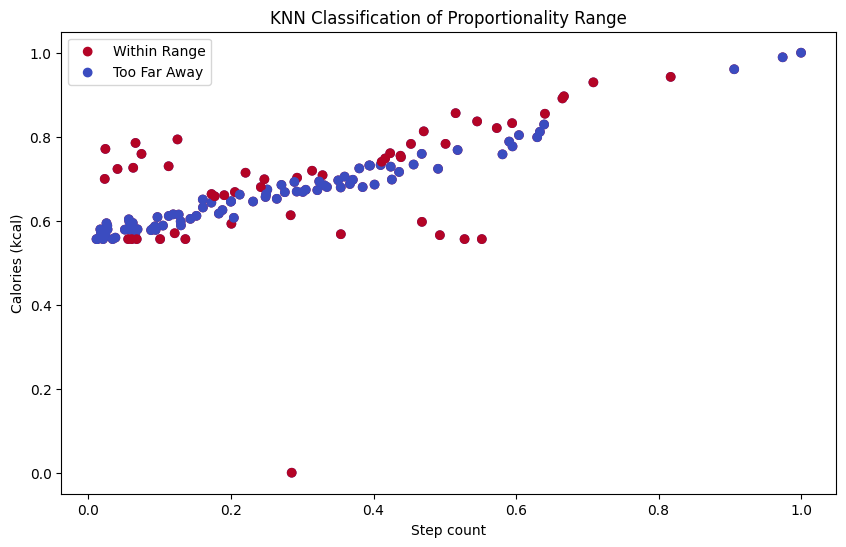

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your data
df = pd.read_csv("Daily activity metrics.csv")
df1 = df[['Date', 'Calories (kcal)', 'Step count', 'Heart Points']]
df1['Date'] = pd.to_datetime(df['Date'])

# Extract the weekday number and add it as a new column
df1['Weekday'] = df1['Date'].dt.weekday

# Select the desired columns
df1 = df1[['Weekday', 'Calories (kcal)', 'Step count']]

# Normalize the numeric columns
numeric_columns = df1.select_dtypes(include='number')
scaler = MinMaxScaler()
n_df1 = scaler.fit_transform(numeric_columns)
n_df1 = pd.DataFrame(n_df1, columns=numeric_columns.columns)

# Split the data into training and testing sets
X = n_df1[['Step count']]
y = n_df1[['Calories (kcal)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create polynomial features
degree = 2  # You can adjust the degree to fit a different order of polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)

# Fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

# Transform the test data to include polynomial features
X_test_poly = poly.transform(X_test)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Calculate k as the square root of the total number of samples
k = int(np.sqrt(X_train.shape[0]))

range_percentage = 5
lower_threshold = (1 - range_percentage / 100) * poly_reg.predict(X_test_poly).ravel()
upper_threshold = (1 + range_percentage / 100) * poly_reg.predict(X_test_poly).ravel()

# Create binary labels where 1 represents within the proportionality range, and 0 represents too far away
labels = np.where((y_test.values.ravel() >= lower_threshold) & (y_test.values.ravel() <= upper_threshold), 1, 0)

# Create a KNN classifier with k as the square root of N
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_test, labels)


# Train the KNN classifier
knn_classifier.fit(X_test, labels)

# Predict the labels for the test data
predicted_labels = knn_classifier.predict(X_test)

# Create a scatter plot to visualize the results
plt.figure(figsize=(10, 6))

# Data points within the proportionality range (green)
plt.scatter(X_test, y_test, c=labels, cmap='coolwarm', label='Within Range')

# Data points too far away (red)
plt.scatter(X_test, y_test, c=~labels, cmap='coolwarm', label='Too Far Away')

plt.title('KNN Classification of Proportionality Range')
plt.xlabel('Step count')
plt.ylabel('Calories (kcal)')
plt.legend()
plt.show()


Evaluation metrics

Accuracy: 0.67
Precision: 0.69
Recall: 0.87
F1 Score: 0.77
Confusion Matrix:


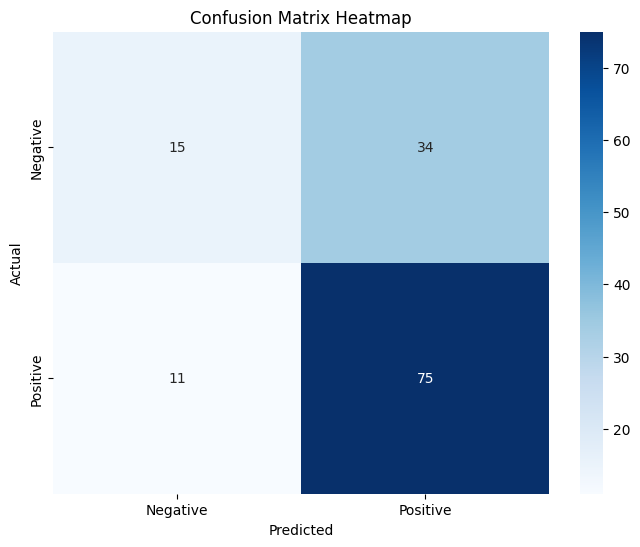

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate the accuracy of the KNN model
accuracy = accuracy_score(labels, predicted_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(labels, predicted_labels)
recall = recall_score(labels, predicted_labels)
f1 = f1_score(labels, predicted_labels)

# Generate the confusion matrix
confusion = confusion_matrix(labels, predicted_labels)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Confusion Matrix:")

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(labels, predicted_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

# Define a range of neighbors to try
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform a grid search with cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_test, labels)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Create a KNN classifier with the best hyperparameters
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_test, labels)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Predict the labels for the test data using the retrained KNN model
predicted_labels = knn_classifier.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(labels, predicted_labels)
recall = recall_score(labels, predicted_labels)
f1 = f1_score(labels, predicted_labels)

# Generate the confusion matrix
confusion = confusion_matrix(labels, predicted_labels)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))



Accuracy: 0.67
Precision: 0.71
Recall: 0.86
F1 Score: 0.78
Confusion Matrix:
[[19 30]
 [12 74]]


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

# Define the number of bins and strategy for discretization
n_bins = 3  # Adjust the number of bins as needed
strategy = 'uniform'  # Adjust the strategy as needed

# Create a KBinsDiscretizer to discretize calorie values
calorie_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
y_train_discrete = calorie_discretizer.fit_transform(y_train)
# Data preprocessing: Apply PCA for dimensionality reduction
pca = PCA(n_components=1)  # Change n_components to 1
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Apply SMOTE for classification
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train_discrete)

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']

# Create an ensemble of KNN models using BaggingClassifier
ensemble_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=best_k, metric=best_metric), n_estimators=10, random_state=42)
ensemble_knn.fit(X_train_resampled, y_train_resampled)
y_test_discrete = calorie_discretizer.transform(y_test)

# Evaluate the ensemble model on the test data
ensemble_accuracy = ensemble_knn.score(X_test_pca, y_test_discrete)
# Evaluate the ensemble model on the test data
#ensemble_accuracy = ensemble_knn.score(X_test_pca, y_test)

print("Ensemble Model Accuracy: {:.2f}".format(ensemble_accuracy))




Ensemble Model Accuracy: 0.74


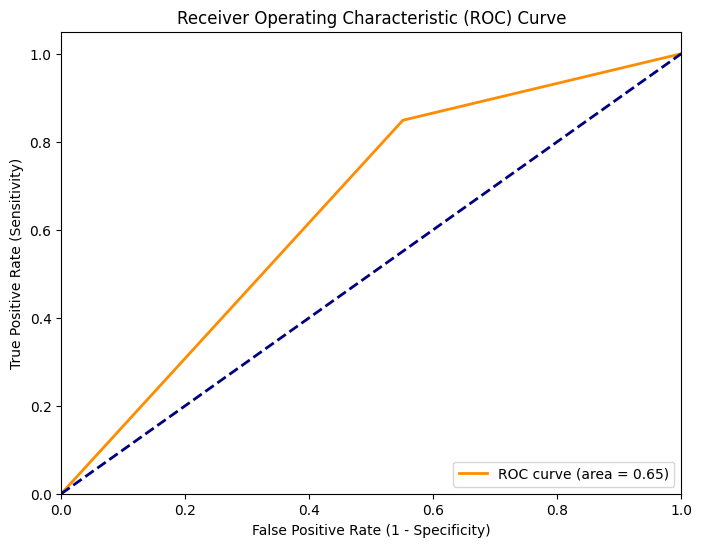

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'predicted_labels' is the binary predictions (1 for within range, 0 for too far away)
# 'labels' is the binary true labels
fpr, tpr, thresholds = roc_curve(labels, predicted_labels)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
